# Spotify Data Exploration and Analysis 
By Alec Plante
![image](images/Record.png)



## Overview:
Life Column Records is falling behind its competitors with the number of hit songs it produces and has asked us to figure out **what makes a hit song?** It will then communicate these findings to artists and implement the suggestions. In order to provide Life Column Records insight into the plan, the steps of the process have been organized below:

# Table of Contents
1. [Business Problem Definition](#part1)
2. [Data Understanding](#part2)
3. [Data Exploration](#part3)
4. [Data Modeling](#part4)
5. [Conclusion and Closing Thoughts](#part5)

## 1. Business Problem Definition <a name="part1"></a>
Life Column Records is facing a significant business problem where they are falling behind their competitors in terms of producing hit songs. This problem could lead to a decrease in their market share and overall revenue. In order to address this issue, they have enlisted the help of our team to figure out what makes a hit song.

This business problem is multi-faceted and involves understanding the key factors that contribute to a song becoming a hit. There are several aspects to consider when analyzing the success of a song, including its melody, lyrics, composition, production, and overall marketability. To solve this problem, we will need to conduct extensive research and analysis to identify the common traits among the top-performing songs in the industry.

## 2. Data Understanding <a name="part2"></a>

### Spotify API 
The Spotify API provides access to a range of audio features, metadata, analysis, and recommendation data. These features can be used to understand the musical characteristics of a song and its potential for success in the market. Here is a list of the features:
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **analysis_url:** A URL to access the full audio analysis of this track. An access token is required to access this data.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **duration_ms:** The duration of the track in milliseconds.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **id:** The Spotify ID for the track.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


### Kworb.net
Kworb.net is a website that tracks the popularity and performance of various music platforms, including Spotify. The website provides a comprehensive overview of the total streams for songs and albums on Spotify.

The data on kworb.net about Spotify total streams is constantly updated and includes information on the total number of streams for individual songs, as well as for albums and artists. The website provides real-time data on the most popular songs and artists on Spotify, based on the number of streams they receive.

The columns included are:
- **Position**
- **Artist**
- **Title**
- **Weeks on chart**
- **Weeks being in top 10**, 
- **Peak Position**
- **(x?): number of weeks in top spot**
- **Peak streams for a week**
- **Total Streams**

### Billboard 
The Billboard Hot 100 is a weekly chart that ranks the top 100 songs in the United States across all genres based on a combination of radio airplay, streaming, and sales data. The chart is published by Billboard, a leading music industry publication.

The data used to compile the Billboard Hot 100 is collected by Nielsen SoundScan and Nielsen BDS, which track sales and airplay data from music retailers and radio stations across the United States. The data is then combined with streaming data from platforms such as YouTube, Spotify, and Apple Music to determine the ranking of each song.

Billboard Hot 100 data includes information such as the **song title, artist name, peak position on the chart, and number of weeks on the chart.** The chart also includes information on the **overall performance of each song, such as its current ranking compared to the previous week and any changes in its overall performance.**

## Data Exploration <a name="part3"></a>
This section shows the process of data exploration and the set up of the notebook.

### Library and Data Imports

In [56]:
#Import needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

For more infomation on the Billboard data, see functions.py

In [ ]:
# import billboard data
billboard = pd.read_csv('Data/billboard100.csv')

In [3]:
#Check info
billboard.info()
#There is an extra column and the dates are not of type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336687 entries, 0 to 336686
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    336687 non-null  int64 
 1   Date          336687 non-null  object
 2   Rank          336687 non-null  int64 
 3   Title         336687 non-null  object
 4   Artist        336687 non-null  object
 5   LastWeek      336687 non-null  object
 6   Peak          336687 non-null  int64 
 7   WeeksOnChart  336687 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 20.5+ MB


In [4]:
#Remove column 0
billboard.drop("Unnamed: 0", axis = 1, inplace=True)

In [5]:
#Change type of Date Column to datetime
billboard["Date"]= pd.to_datetime(billboard["Date"])

In [6]:
# See changes
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336687 entries, 0 to 336686
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          336687 non-null  datetime64[ns]
 1   Rank          336687 non-null  int64         
 2   Title         336687 non-null  object        
 3   Artist        336687 non-null  object        
 4   LastWeek      336687 non-null  object        
 5   Peak          336687 non-null  int64         
 6   WeeksOnChart  336687 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 18.0+ MB


In [7]:
#Update with new data from the billboard chart
updatedata(billboard)

INIT: getdata from 2023-02-04 00:00:00
INIT: request page 2023-02-11


C:\Users\aplante\OneDrive - Deloitte (O365D)\Documents\AI-Academy\Project\functions.py:85: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 85 of the file C:\Users\aplante\OneDrive - Deloitte (O365D)\Documents\AI-Academy\Project\functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  data = BeautifulSoup(r.content, parser="lxml")


INIT: request page 2023-02-18
INIT: request page 2023-02-25
END: getdata from 2023-02-04 00:00:00


In [8]:
# ensure that no date was counted twice
max(billboard['Date'].value_counts())

100

For more infomation on the Billboard data, see SpotifyAPIRequestAndCleaning.ipynb and KworbScrape.ipynb

In [215]:
# Load in data that I grabbed from the spotify API
topSongs  = pd.read_csv("Data/topSpotifyStripped.tsv")
randSongs = pd.read_csv("Data/topSpotifyStrippedRand.tsv")

# For more on this, see the spotify API notebook

In [6]:
#Combine the songs by appending the tables
combinedSongs = topSongs.append(randSongs).drop('Unnamed: 0', axis = 1)

In [7]:
# Drop duplicated between the lists
combinedSongs.drop_duplicates(['songid'], inplace = True)

In [8]:
# reset the index and and remove the index column
combinedSongs = combinedSongs.reset_index().drop('index', axis=1)

In [22]:
print(f"Number of rows in the data: {len(combinedSongs)}")
print(f"Number of columns in the data: {len(combinedSongs.columns)}")
combinedSongs.head()

Number of rows in the data: 11030
Number of columns in the data: 23


Artist                                          Title  \
0     The Weeknd                                Blinding Lights   
1     Ed Sheeran                                   Shape of You   
2  Lewis Capaldi                              Someone You Loved   
3    Tones And I                                   Dance Monkey   
4    Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   

                                                info  \
0  {'tracks': {'href': 'https://api.spotify.com/v...   
1  {'tracks': {'href': 'https://api.spotify.com/v...   
2  {'tracks': {'href': 'https://api.spotify.com/v...   
3  {'tracks': {'href': 'https://api.spotify.com/v...   
4  {'tracks': {'href': 'https://api.spotify.com/v...   

                                               items  \
0  {'album': {'album_group': 'album', 'album_type...   
1  {'album': {'album_group': 'album', 'album_type...   
2  {'album': {'album_group': 'album', 'album_type...   
3  {'album': {'album_group': 'single', 'album_typ...   
4  {'album': {'album_group': 'compilation', 'albu...   

                                             artists                  songid  \
0         [{'1Xyo4u8uXC1ZmMpatF05PJ': 'The Weeknd'}]  0VjIjW4GlUZAMYd2vXMi3b   
1         [{'6eUKZXaKkcviH0Ku9w2n3V': 'Ed Sheeran'}]  7qiZfU4dY1lWllzX7mPBI3   
2      [{'4GNC7GD6oZMSxPGyXy4MNB': 'Lewis Capaldi'}]  7qEHsqek33rTcFNT9PFqLf   
3        [{'2NjfBq1NflQcKSeiDooVjY': 'Tones And I'}]  2XU0oxnq2qxCpomAAuJY8K   
4  [{'246dkjvS1zLTtiykXe5h60': 'Post Malone'}, {'...  3KkXRkHbMCARz0aVfEt68P   

   popularity explicit release_date  \
0        90.0    False   2020-03-20   
1        86.0    False   2017-03-03   
2        87.0    False   2019-05-17   
3        77.0    False   2019-10-17   
4        81.0    False   2018-12-14   

                                            features  ...  loudness  mode  \
0  {'danceability': 0.514, 'energy': 0.73, 'key':...  ...    -5.934   1.0   
1  {'danceability': 0.825, 'energy': 0.652, 'key'...  ...    -3.183   0.0   
2  {'danceability': 0.501, 'energy': 0.405, 'key'...  ...    -5.679   1.0   
3  {'danceability': 0.824, 'energy': 0.588, 'key'...  ...    -6.400   0.0   
4  {'danceability': 0.76, 'energy': 0.479, 'key':...  ...    -5.574   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0598       0.00146          0.000095    0.0897    0.334  171.005   
1       0.0802       0.58100          0.000000    0.0931    0.931   95.977   
2       0.0319       0.75100          0.000000    0.1050    0.446  109.891   
3       0.0924       0.69200          0.000104    0.1490    0.513   98.027   
4       0.0466       0.55600          0.000000    0.0703    0.913   89.911   

   duration_ms  time_signature  
0     200040.0             4.0  
1     233713.0             4.0  
2     182161.0             4.0  
3     209438.0             4.0  
4     158040.0             4.0  

[5 rows x 23 columns]

In [10]:
#find which rows are na
combinedSongs.loc[pd.isnull(combinedSongs['features'])]

Artist                                  Title  \
3610                Pop Smoke                         Bout A Million   
5138           Samir & Viktor                                Groupie   
6976                  Aileron                          Quantum White   
7194                 Dreamlux             White Noise is for Napping   
8614             Milli Hughes                     Deep Phase Noise 1   
9016   Florence + The Machine  You've Got The Love - Jamie xx Rework   
9190            Billie Eilish           you should see me in a crown   
9470               Kali Uchis                        After The Storm   
9819               Sonu Nigam       Aiyo Aiyo Rama - From ''Jungle''   
9898          Lata Mangeshkar        Zeehale Muskin - From "Ghulami"   
10017          The Wild Earth              Infinite Sea Waves, Pt. 1   
10101       Falling into Pink                Pink Noise for Sleeping   
10310              Katy Perry              Hot N Cold - Rock Version   

                                                    info  \
3610   {'tracks': {'href': 'https://api.spotify.com/v...   
5138   {'tracks': {'href': 'https://api.spotify.com/v...   
6976   {'tracks': {'href': 'https://api.spotify.com/v...   
7194   {'tracks': {'href': 'https://api.spotify.com/v...   
8614   {'tracks': {'href': 'https://api.spotify.com/v...   
9016   {'tracks': {'href': 'https://api.spotify.com/v...   
9190   {'tracks': {'href': 'https://api.spotify.com/v...   
9470   {'tracks': {'href': 'https://api.spotify.com/v...   
9819   {'tracks': {'href': 'https://api.spotify.com/v...   
9898   {'tracks': {'href': 'https://api.spotify.com/v...   
10017  {'tracks': {'href': 'https://api.spotify.com/v...   
10101  {'tracks': {'href': 'https://api.spotify.com/v...   
10310  {'tracks': {'href': 'https://api.spotify.com/v...   

                                                   items  \
3610   {'album': {'album_group': 'compilation', 'albu...   
5138                                                 NaN   
6976   {'album': {'album_group': 'single', 'album_typ...   
7194   {'album': {'album_group': 'single', 'album_typ...   
8614   {'album': {'album_group': 'single', 'album_typ...   
9016   {'album': {'album_group': 'compilation', 'albu...   
9190   {'album': {'album_group': 'compilation', 'albu...   
9470   {'album': {'album_group': 'compilation', 'albu...   
9819   {'album': {'album_group': 'compilation', 'albu...   
9898   {'album': {'album_group': 'compilation', 'albu...   
10017  {'album': {'album_group': 'album', 'album_type...   
10101  {'album': {'album_group': 'single', 'album_typ...   
10310  {'album': {'album_group': 'compilation', 'albu...   

                                                 artists  \
3610   [{'0eDvMgVFoNV3TpwtrVCoTj': 'Pop Smoke'}, {'1U...   
5138                                                 NaN   
6976             [{'2KETNse3N25ZwsHhq2iQnt': 'Aileron'}]   
7194            [{'608c6CqBFogFms9icxSr2F': 'Dreamlux'}]   
8614        [{'5qq6C4dNld3AWHbh2WaNAR': 'Milli Hughes'}]   
9016   [{'1moxjboGR7GNWYIMWsRjgG': 'Florence + The Ma...   
9190       [{'6qqNVTkY8uBg9cP3Jd7DAH': 'Billie Eilish'}]   
9470   [{'1U1el3k54VvEUzo3ybLPlM': 'Kali Uchis'}, {'4...   
9819   [{'1dVygo6tRFXC8CSWURQJq2': 'Sonu Nigam'}, {'3...   
9898   [{'61JrslREXq98hurYL2hYoc': 'Lata Mangeshkar'}...   
10017     [{'0UbJMSaglspBc77JGlmDzM': 'The Wild Earth'}]   
10101  [{'6GpFiBAVovOVJfK7OTWnxN': 'Falling into Pink'}]   
10310         [{'6jJ0s89eD6GaHleKKya26X': 'Katy Perry'}]   

                       songid  popularity explicit release_date features  ...  \
3610   6foz9Xzoi7YvPBTWSkf7wx         0.0     True   2023-03-24      NaN  ...   
5138                      NaN         NaN      NaN          NaN      NaN  ...   
6976   5DqjEVkM7PA3bMaEhkrUdb        62.0    False   2022-02-17      NaN  ...   
7194   1auhrJevFfuhjPaIt9b2XH        69.0    False   2021-05-26      NaN  ...   
8614   5MOWBRtP53q5yNOtHaMVTh        69.0    False   2022-02-15      NaN  ...   
9016 

In [11]:
# drop all the NA values
combinedSongs.dropna(inplace=True)

In [24]:
combinedSongs.columns

Index(['Artist', 'Title', 'info', 'items', 'artists', 'songid', 'popularity',
       'explicit', 'release_date', 'features', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

### EDA

Before EDA, here are the what each column means:
- **Artist**: Name of the main Aritst on the track
- **Title**: Title of the track
- **info**: Uncleaned inforamtion about the track, not used in analysis
- **items**: A section of info, more uncleaned data about the track
- **artists**: A dictionary of Artists on the track and their corresponding ID's
- **songid**: ID for the given song
- **popularity**: Popularity metric given by spotify. Calculated using total streams, recency of Streams, number of saves, and other, skip rate, and other similar measures. This is what we are trying to predict.
- **explicit**: States whether the song is explicit (boolean)
- **release_date**: Release date. Not always precise to the day
- **features**: a dictionary listing all features, not used in data analysis
- **danceability**: a measure of how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy**: a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **duration_ms**: The duration of the track in milliseconds.
- **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Source: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

To get a good idea of the realtionships between variables and the distributions of variables, seaborns pairplot can be used

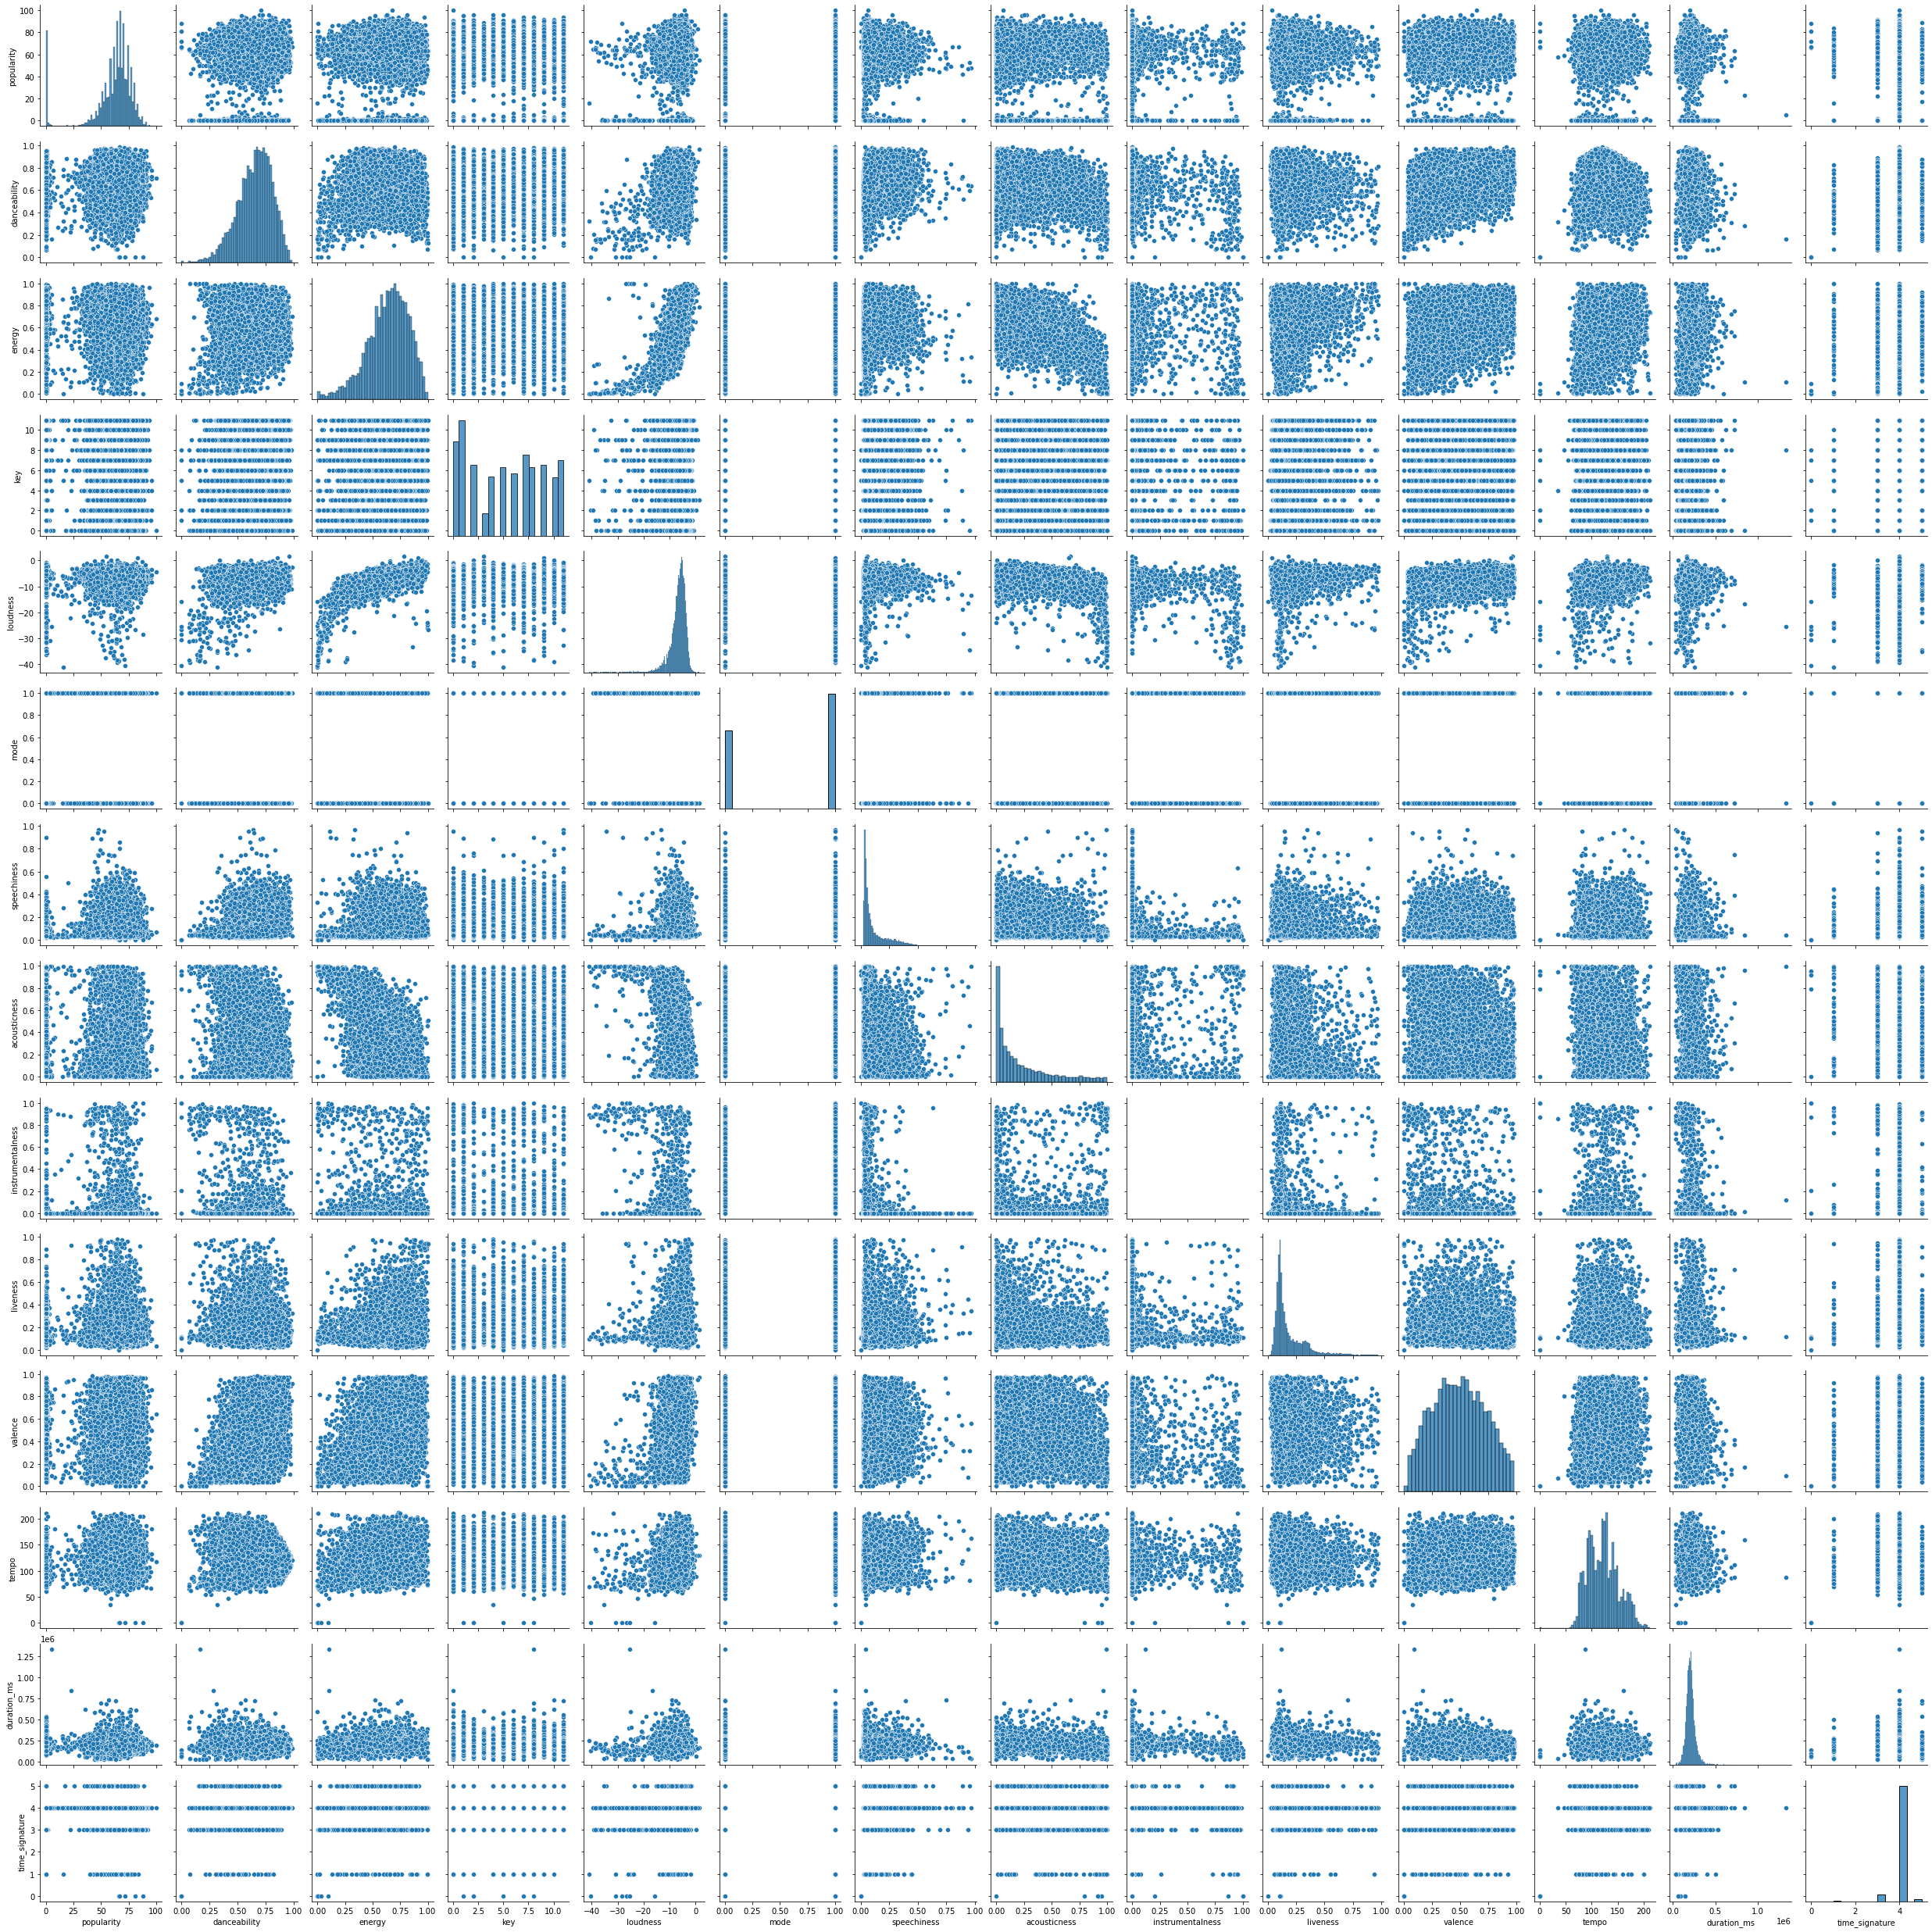

In [49]:
sns.pairplot(combinedSongs[numCols])

This is not easy to see, so I will list observations that I deem important:
- Because of the number of observations, its hard to see how many
- Loudness and energy seem to be exponentially coordinated
- It seems very unlikely for a song to have high valence and low dancability
- Mode, key, and time signature need to be converted to categorical variables
- Most songs are in 4:4 time signature
- Most songs seem to have little or no speechiness and acousticness
- Loudness is left skewed
- Most variable distributions seem to be near normality

Now, we'll look at a heat map to view the correlation between variables

<AxesSubplot:>

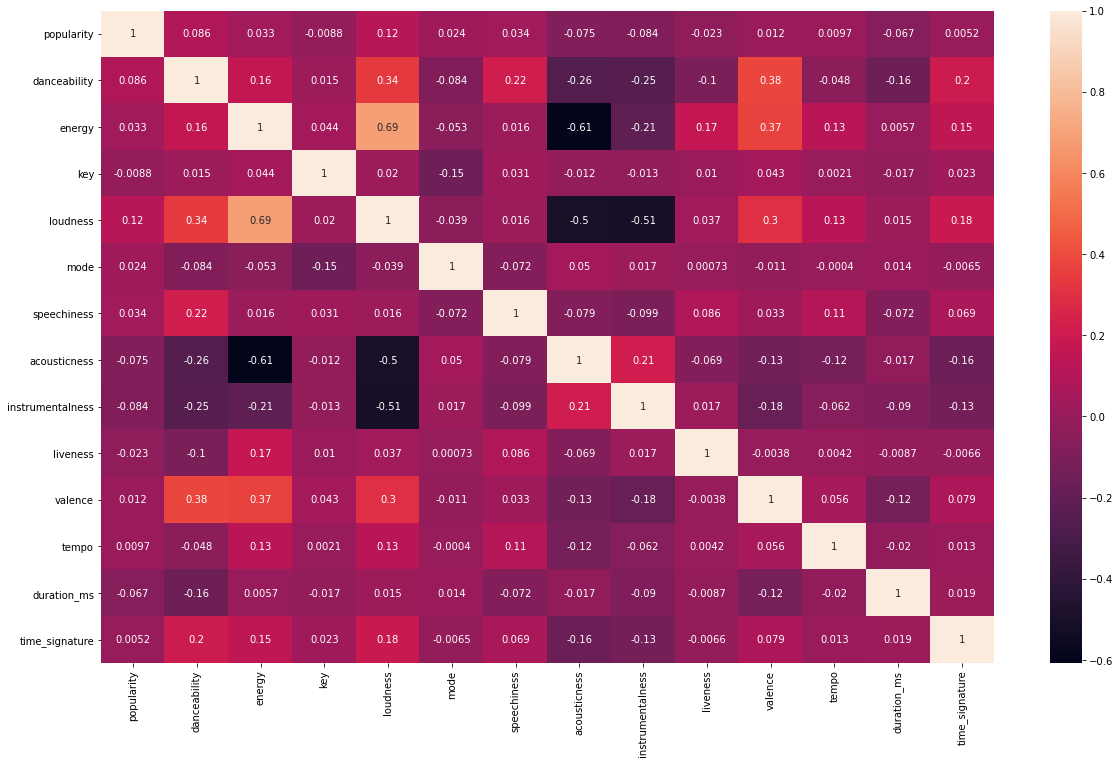

In [38]:
plt.figure(figsize=(20, 12))
sns.heatmap(combinedSongs.corr(),annot = True)

The Highly Correlated variables are as follows:
- Energy and Loudness (positive)
- Acousticness and Energy (negative)
- Accoustickness and Loudness (negative)
- Instrumetalness and Loudness (negative)

Let's take a closer look at the columns:

In [28]:
combinedSongs.columns

Index(['Artist', 'Title', 'info', 'items', 'artists', 'songid', 'popularity',
       'explicit', 'release_date', 'features', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [33]:
combinedSongs.dtypes

Artist               object
Title                object
info                 object
items                object
artists              object
songid               object
popularity          float64
explicit             object
release_date         object
features             object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

I need to one hot encode the mode, key, and time signature variables. This is to make data analysis easier

In [30]:
numCols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [31]:
X = combinedSongs[numCols].drop('popularity', axis=1).copy()

y = combinedSongs['popularity']
X_cat = X[['mode','key','time_signature']]
X_num = X.drop(['mode','key','time_signature'],axis=1)

In [32]:
X = pd.get_dummies(X , columns = ['mode','key','time_signature'], drop_first=True)
X

danceability  energy  loudness  speechiness  acousticness  \
0             0.514   0.730    -5.934       0.0598       0.00146   
1             0.825   0.652    -3.183       0.0802       0.58100   
2             0.501   0.405    -5.679       0.0319       0.75100   
3             0.824   0.588    -6.400       0.0924       0.69200   
4             0.760   0.479    -5.574       0.0466       0.55600   
...             ...     ...       ...          ...           ...   
11038         0.476   0.840    -2.259       0.0580       0.11000   
11039         0.508   0.763    -3.580       0.0516       0.16000   
11040         0.840   0.796    -5.678       0.1190       0.20900   
11041         0.621   0.403    -8.211       0.0359       0.58100   
11042         0.257   0.618   -11.348       0.1290       0.34800   

       instrumentalness  liveness  valence    tempo  duration_ms  ...  \
0              0.000095    0.0897    0.334  171.005     200040.0  ...   
1              0.000000    0.0931    0.931   95.977     233713.0  ...   
2              0.000000    0.1050    0.446  109.891     182161.0  ...   
3              0.000104    0.1490    0.513   98.027     209438.0  ...   
4              0.000000    0.0703    0.913   89.911     158040.0  ...   
...                 ...       ...      ...      ...          ...  ...   
11038          0.000000    0.0460    0.648  156.254     177253.0  ...   
11039          0.000000    0.1180    0.476  139.653     395987.0  ...   
11040          0.002400    0.0908    0.787  110.438     183053.0  ...   
11041          0.000000    0.1140    0.634  145.523     232133.0  ...   
11042          0.099200    0.3700    0.544  142.783     168221.0  ...   

       key_6.0  key_7.0  key_8.0  key_9.0  key_10.0  key_11.0  \
0            0        0        0        0         0         0   
1            0        0        0        0         0         0   
2            0        0        0        0         0         0   
3            1        0        0        0         0         0   
4            0        0        0        0         0         0   
...        ...      ...      ...      ...       ...       ...   
11038        0        0        0        0         0         0   
11039        0        0        1        0         0         0   
11040        0        0        1        0         0         0   
11041        0        0        0        1         0         0   
11042        1        0        0        0         0         0   

       time_signature_1.0  time_signature_3.0  time_signature_4.0  \
0                       0                   0                   1   
1                       0                   0                   1   
2                       0                   0                   1   
3                       0                   0                   1   
4                       0                   0                   1   
...                   ...                 ...                 ...   
11038                   0                   0                   1   
11039                   0                   0                   1   
11040                   0                   0                   1   
11041                   0                   0                   1   
11042                   0                   1                   0   

       time_signature_5.0  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
11038                   0  
11039                   0  
11040                   0  
11041                   0  
11042                   0  

[11030 rows x 26 columns]

### Visualizations for the Presentation

[Text(0.5, 1.0, 'Energy and Loudness')]

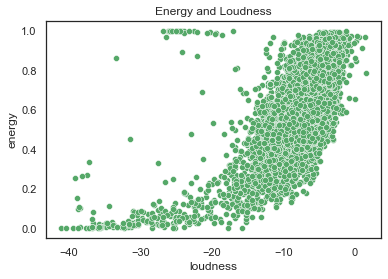

In [212]:
#show the relationship betweeen energy and loudness
sns.scatterplot(data = combinedSongs, x='loudness', y='energy', color = ['g']).set(title="Energy and Loudness")

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

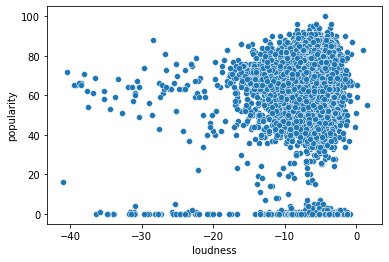

In [23]:
# loudness vs popularity
sns.scatterplot(data = combinedSongs, x='loudness', y='popularity')

[Text(0.5, 1.0, 'Distribution of Acousticness')]

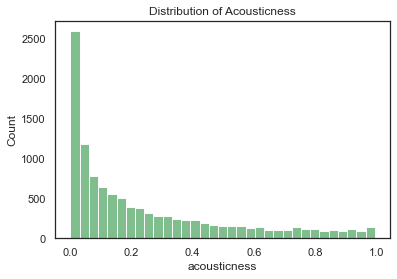

In [205]:
# Distribution of acousticness
sns.set_theme(style = 'white')
sns.histplot(combinedSongs['acousticness'], color = ['g']).set(title = "Distribution of Acousticness")

In [211]:

combinedSongs['acousticness'].describe()

count    11030.000000
mean         0.244189
std          0.267138
min          0.000000
25%          0.033700
50%          0.137000
75%          0.378000
max          0.996000
Name: acousticness, dtype: float64

## Data Modeling <a name="part4"></a>

### Regression

I will try to run a regression on this data, but it's likely not going to work, based on the graphs above. The data seeems to be more or less random

In [33]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     14.53
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           6.54e-63
Time:                        20:08:16   Log-Likelihood:                -48996.
No. Observations:               11030   AIC:                         9.805e+04
Df Residuals:                   11003   BIC:                         9.824e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 97.5834      7

Here are the important take aways from this regression:
- The R^2 value is terrible. this means that the prediction power of this model is poor. This is expected based on trying to find the relationships between varaibles above
- There is a statistically significant relationship between some of these variables and popularity
- Ther durbin Watson Coefficient does not indicate autocorrelation
- The data is slightly skewed
- The data has a relatively high peak (tightly packed)

Here are the variables that have a statistically significant impact, inlcuding the projected effect
- **danceability**: more dancability -> more popular
- **energy**: more energy -> less popular
- **loudness**: louder -> more popular
- **speechiness**: more speechy -> more popular
- **acousticness**: more acoustic -> less popular
- **valence**: sadder songs are -> more popular [are we doing okay?:^(]
- **duration_ms**: the shorter the song is, the more popular it is
- **mode**: songs with major modality do better
- **key_3**: songs in D sharp/ E flat are more popular
- **key_6**: songs in F sharp/ G flat are more popular
- **key_8**: songs in G sharp/ A flat are more popular

Its importatnt to note that mode and key go hand in hand. That is, songs are labeled in key/mode (C Major). Therefore, we should view both together:

<AxesSubplot:xlabel='mode', ylabel='popularity'>

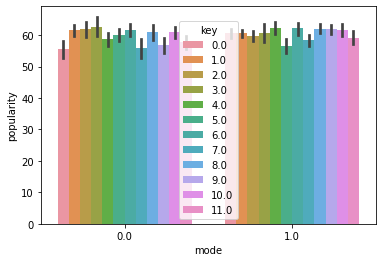

In [41]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = combinedSongs)

It doesn't seem to make a large difference

While the model is rather underwhelming, it reveals a lot about our data, including relationships and key variables we should look out for when creating a hit.

### Random Forrest

Before building a model, we need to classify whats a hit and whats not based on popularity. We'll try a few different methods. 
- Decision Tree Regressor
- Decision Tree Classifier: whether or not the track will be a failure (<20 popularity)
- Decision Tree Classifier: Track will be a failure (<=20 popularity), somewhat of a success(20<x<=67), or a success (67<x)
- 
At first, we can try a popularity of 60+

In [108]:
y.describe()

count    11030.000000
mean        59.915322
std         20.907052
min          0.000000
25%         57.000000
50%         66.000000
75%         72.000000
max        100.000000
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity', ylabel='Count'>

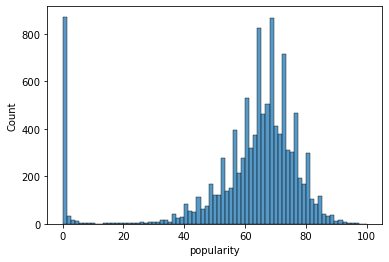

In [105]:
sns.histplot(y)

#### Decision Tree Regressor

Note: for these models, we will use general accuracy (Succesfull guesses / Total guesses). You don't want false positive or false negatives, so general accuracy works great. Too many false positives will result in too much money being dumped into promoting songs that are not hits, and too many false negaitives will lead to missing potential massive hits.

In [168]:
#train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

In [111]:
# check the best depth to use based on RMSE
max_depth_range = range(1, 15)

RMSE_scores = []

from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=123)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

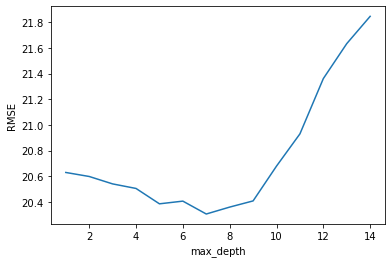

In [112]:
# plot to see result
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE');
# 7 seems to be the best number

In [113]:
# Build a baseline tree
# Instantiate and fit a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=7) 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

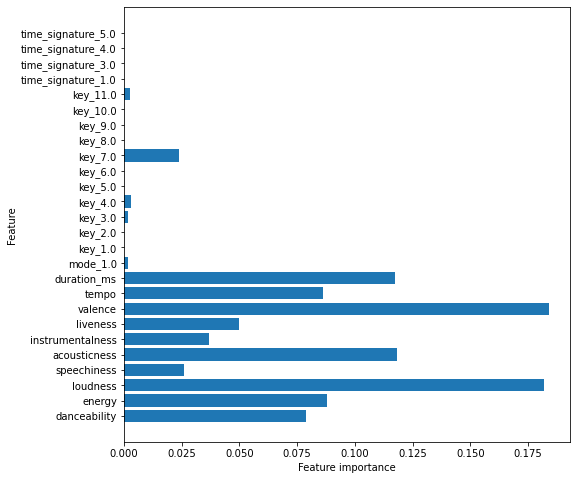

In [80]:
# Examine Feature importance for each feature in the tree
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_reg)

Valence and Loudness arethe most important features here

In [175]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=150,
                              max_depth=7,
                              oob_score=True,
                              random_state=731)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, oob_score=True,
                      random_state=731)

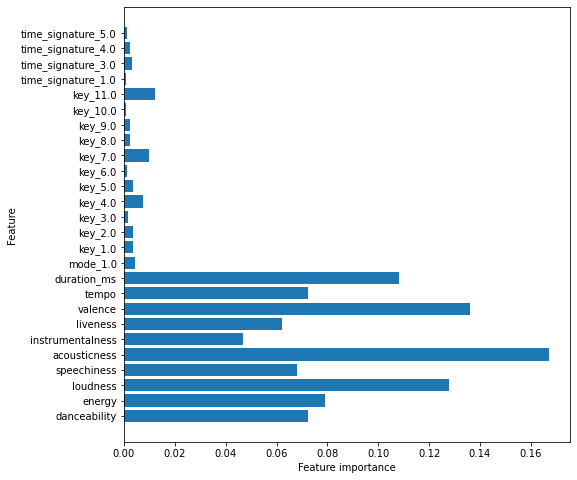

In [176]:
plot_feature_importances(forest_reg)

Acousticness, Loudness, and valence are again among the most important

#### Decision Tree Classifier: 2 categories

In [130]:
y_dud = y.apply(lambda x: 1 if x<=20 else 0)

In [131]:
#train Test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_dud, test_size = 0.25, random_state=123)

In [132]:
# Lets check the best depth to use based on RMSE
max_depth_range = range(1, 15)

RMSE_scores = []

from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=123)
    MSE_scores = cross_val_score(treereg, X_train_clf, y_train_clf, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

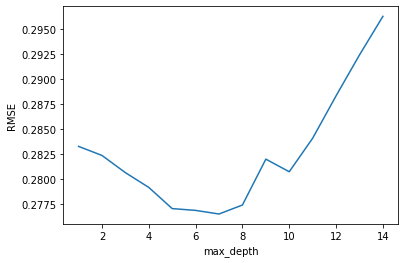

In [133]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE');
# 7 seems to be the best number

In [134]:
# Build a baseline tree
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7) 
tree_clf.fit(X_train_clf, y_train_clf)

DecisionTreeClassifier(max_depth=7)

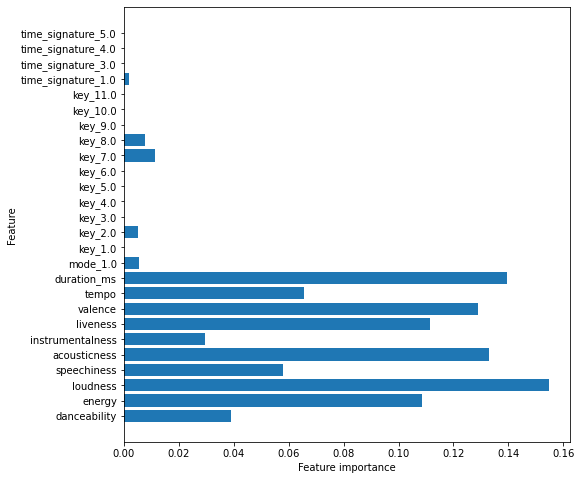

In [135]:
# Examine Feature importance for each feature in the tree
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

Loundess, Valence, Time, and acousticness are the most important

In [136]:
# Test set predictions
pred_clf = tree_clf.predict(X_test_clf)

# Confusion matrix and classification report
print(confusion_matrix(y_test_clf, pred_clf))
print(classification_report(y_test_clf, pred_clf))

[[2504   31]
 [ 172   51]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2535
           1       0.62      0.23      0.33       223

    accuracy                           0.93      2758
   macro avg       0.78      0.61      0.65      2758
weighted avg       0.91      0.93      0.91      2758



91% looks pretty good. But when looking the accuracy you get when you just guess that the song is not unpopular, its the same

In [182]:
print(f"dud%: {len(y_dud[y_dud==1])}, notDud%: {len(y_dud)}, Percenage = {(1-len(y_dud[y_dud==1])/len(y_dud))*100}%")

dud%: 963, notDud%: 11030, Percenage = 91.26926563916591%


In [178]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=150,
                              max_depth=7,
                              oob_score=True,
                              random_state=731)
forest.fit(X_train_clf, y_train_clf)

RandomForestClassifier(max_depth=7, n_estimators=150, oob_score=True,
                       random_state=731)

In [179]:
# Training accuracy score
forest.score(X_train_clf, y_train_clf)

0.9262572533849129

In [180]:
forest.score(X_test_clf, y_test_clf)

0.9314720812182741

By using a random forrest, we got a 2% more accuracy, which is slightly better

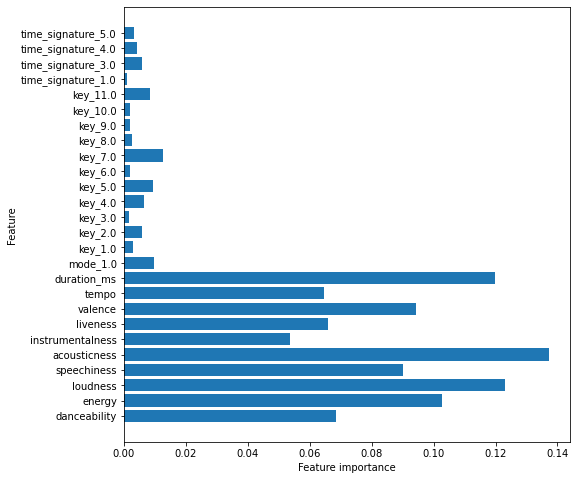

In [181]:
plot_feature_importances(forest)

#### Decision Tree Classifier: 3 categories

In [157]:
y_clf2 = y.apply(lambda x: 0 if x<=20 else (1 if x<67 else 2))

In [158]:
#train Test split
X_train_clf2, X_test_clf2, y_train_clf2, y_test_clf2 = train_test_split(X, y_clf2, test_size = 0.25, random_state=123)

In [162]:
# Lets check the best depth to use based on RMSE
max_depth_range = range(1, 15)

RMSE_scores = []

from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=123)
    MSE_scores = cross_val_score(treereg, X_train_clf2, y_train_clf2, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

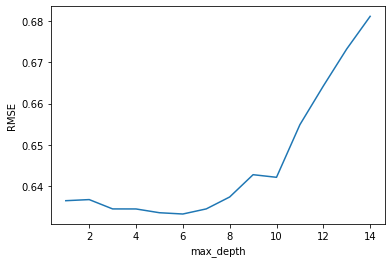

In [163]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE');
# 6 seems to be the best number

In [164]:
# Build a baseline tree
# Instantiate and fit a DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(max_depth=6) 
tree_clf2.fit(X_train_clf2, y_train_clf2)

DecisionTreeClassifier(max_depth=6)

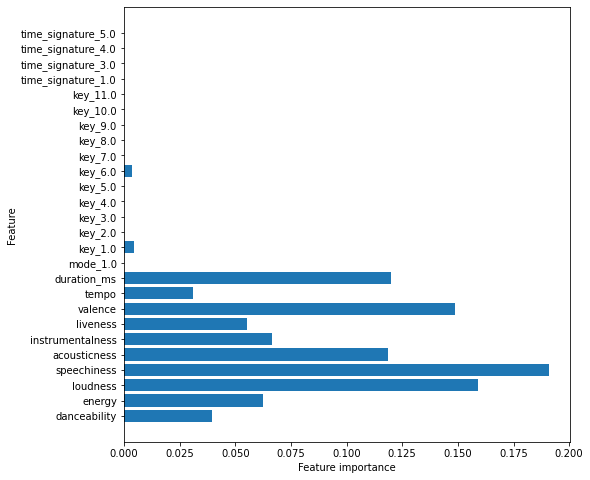

In [165]:
# Examine Feature importance for each feature in the tree
def plot_feature_importances(model):
    n_features = X_train_clf2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_clf2.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf2)

Time, Loudness, Acousticness, Valence

According to the decision tree, acousticness loudness and duration are the most important featutes

In [166]:
# Test set predictions
pred = tree_clf2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test_clf2, pred))
print(classification_report(y_test_clf2, pred))

[[ 38  37 148]
 [  5 592 679]
 [  7 465 787]]
              precision    recall  f1-score   support

           0       0.76      0.17      0.28       223
           1       0.54      0.46      0.50      1276
           2       0.49      0.63      0.55      1259

    accuracy                           0.51      2758
   macro avg       0.60      0.42      0.44      2758
weighted avg       0.53      0.51      0.50      2758



In [177]:
print(f"Middle Count: {len(y_clf2[y_clf2==1])}, Percenage = {len(y_clf2[y_clf2==1])/len(y_clf2)}")

Middle Count: 4987, Percenage = 0.45213055303717137


This is 5% better than guessing category 1 every time. So not fantastic, but it has some prediction power. This model is the most versitile and sees the greatest increase in accuracy, so we sould use it.

In [183]:
forest_clf2 = RandomForestClassifier(n_estimators=150,
                              max_depth=7,
                              oob_score=True,
                              random_state=731)
forest_clf2.fit(X_train_clf2, y_train_clf2)

RandomForestClassifier(max_depth=7, n_estimators=150, oob_score=True,
                       random_state=731)

In [184]:
# Training accuracy score
forest_clf2.score(X_train_clf2, y_train_clf2)

0.5994922630560928

In [185]:
forest_clf2.score(X_test_clf2, y_test_clf2)

0.5166787527193618

## Conclusion and Closing Thoughts <a name="part5"></a>
While this analysis proved to be ineffective in predicting the popularity of a song, there is a lot to learn from this analysis and many ways to improve. Here are some closing thoughts:
- A songs popularity is based on many factors outside of the content of the song itself. If Drake drops a single, no matter what the content is, its will have high popularity. The flipside of this is that many other songs could hit all the marks for a "good" song, but never gain traction because of the context and artist that the song is in.
- Music is subjective. More dancable music performs better, which means that more regular and predicatable rhythms do well. I personally really like music with a lot of Syncopation, or irregular rhythm. I also like a lot of expiramental music, which never performs well in the popular music space. Popularity does not equate to good art.
- The genre the music is a part of will also have a huge role in the popularity. 99% of experimental hip hop listeners can listen to "The Bends" by Earl Sweatshirt, but it will never acheive massive popularity becasue the following of that genre is low.



### Routes and Ideas for Possible Improvement
- With more resources (time and money) more can be done. A model that could've worked well, perhaps the best, is a Neural Network. But because of time constraints, I was unable to create one. Larger models which could also be more effective would need cloud resources to run (or a lot of hardware). This is unattainable for this course.
- Furthermore, we could've created our own metrics or new metrics from the music data, leading to better input data.
- We could've analyzed the music files directly, detecting trends in songs unseen by these features. This again would require a lot of resources
- There is a known pipeline of TikTok streams to Spotify Streams. With access to TikTok data and more time and money, a really good correlation could be found. This was my original idea for this, but TikTok sound data was nearly impossible to find without paying for a service. There is a theory that suggests that theres a trend to make music more TikTok friendly to get more revenue. I personally belive this theory, as musical content has changed noticably in recent years.
- Another path I would've taken if I had more time was to create a small DB system with. Below is the ERD for the database I planned. This would've helped me connect genres to songs more accurately.

![image](images/erd.jpg)


I believe that this type of analysis will become more important in the near future as social media algorythms move towards rewarding songs based on the content rather than based on the artist. Older algorythms reward creators (i.e. instagram stars with a lot of followers), while newer algorythms will reward songs that are similar to what listeners like now based on the acutal content of the song, as can be seen with TikTok that recommends videos from very small creators quite frequently. As this technology progresses, making songs similar to popular songs will give people an opportunity to reach a wider audience. 

Overall, this project is interesting, and made me look at music differently. I have always found the commoditization of art to be very interesting. Artists seem to be moving away from what makes good art and closer to what will sell. I think this leads to a worse quality in art. We'll see how the landscape of music and other forms of art play out in years to come. 
